In [74]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats


In [94]:
df = pd.read_csv('bitcoin_data.csv')

print(df.head())
print(df.info())


    timestamp  block_height  tx_count  mempool_size_mb  min_fee_rate  \
0  1725156820        803299     29424         6.170293  1.000000e-08   
1  1725156825        803300     29433         6.172034  1.000000e-08   
2  1725156830        803301     29441         6.173171  1.000000e-08   
3  1725156834        803302     29452         6.174935  1.000000e-08   
4  1725156839        803303     29460         6.176499  1.000000e-08   

   max_fee_rate  avg_fee_rate  median_fee_rate  fee_rate_10th  fee_rate_90th  \
0      0.000002  2.546653e-08     2.317460e-08   2.206349e-08   2.492063e-08   
1      0.000002  2.547332e-08     2.317460e-08   2.206349e-08   2.492754e-08   
2      0.000002  2.547714e-08     2.317460e-08   2.206349e-08   2.500000e-08   
3      0.000002  2.548790e-08     2.317460e-08   2.206349e-08   2.500000e-08   
4      0.000002  2.550336e-08     2.317460e-08   2.206349e-08   2.500000e-08   

   ...    difficulty     hash_rate  mempool_min_fee  total_fee  mempool_usage  \
0  ..

In [95]:
# Convert 'block_time' to datetime
df['block_time'] = pd.to_datetime(df['block_time'], unit='s')

# Set 'block_time' as index
df.set_index('block_time', inplace=True)

In [96]:
df

,timestamp,block_height,tx_count,mempool_size_mb,min_fee_rate,max_fee_rate,avg_fee_rate,median_fee_rate,fee_rate_10th,fee_rate_90th,...,difficulty,hash_rate,mempool_min_fee,total_fee,mempool_usage,transaction_count,block_weight,block_version,block_interval,block_median_fee_rate
block_time,,,,,,,,,,,,,,,,,,,,,
2023-08-15 13:04:26,1725156820,803299,29424,6.170293,1.000000e-08,2.000000e-06,2.546653e-08,2.317460e-08,2.206349e-08,2.492063e-08,...,5.239118e+13,6.574572e+20,0.00001,0.155298,46511376,3401,3993402,793116672,NaN,8.000000e-08
2023-08-15 13:07:55,1725156825,803300,29433,6.172034,1.000000e-08,2.000000e-06,2.547332e-08,2.317460e-08,2.206349e-08,2.492754e-08,...,5.239118e+13,6.574572e+20,0.00001,0.155378,46523920,5048,3993409,557588480,209.0,6.397059e-08
2023-08-15 13:08:04,1725156830,803301,29441,6.173171,1.000000e-08,2.000000e-06,2.547714e-08,2.317460e-08,2.206349e-08,2.500000e-08,...,5.239118e+13,6.574572e+20,0.00001,0.155421,46534048,6392,3997929,536870912,9.0,6.345588e-08
2023-08-15 13:16:21,1725156834,803302,29452,6.174935,1.000000e-08,2.000000e-06,2.548790e-08,2.317460e-08,2.206349e-08,2.500000e-08,...,5.239118e+13,6.574572e+20,0.00001,0.155512,46548576,4308,3993126,783720448,497.0,6.389706e-08
2023-08-15 13:26:12,1725156839,803303,29460,6.176499,1.000000e-08,2.000000e-06,2.550336e-08,2.317460e-08,2.206349e-08,2.500000e-08,...,5.239118e+13,6.574572e+20,0.00001,0.155637,46560192,3335,3993490,830971904,591.0,7.059715e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-04 09:53:09,1725217259,810594,47672,11.445633,1.000000e-08,3.000000e-06,2.705004e-08,2.330709e-08,2.015038e-08,3.000000e-08,...,5.732151e+13,6.327741e+20,0.00001,0.296407,79449040,3364,3993344,1073733632,2596.0,3.300000e-07
2023-10-04 10:02:21,1725217277,810595,47723,11.461023,1.000000e-08,3.000000e-06,2.710199e-08,2.330709e-08,2.015748e-08,3.000000e-08,...,5.732151e+13,6.327741e+20,0.00001,0.297290,79545344,1624,3993329,661356544,552.0,2.900000e-07
2023-10-04 10:10:14,1725217285,810596,47741,11.465326,1.000000e-08,3.000000e-06,2.712268e-08,2.330709e-08,2.015873e-08,3.000000e-08,...,5.732151e+13,6.327741e+20,0.00001,0.297656,79572960,3586,3993178,536879104,473.0,2.700000e-07


In [97]:

def plot_boxplots(df, title):
    n_cols = len(df.columns)
    n_rows = (n_cols + 3) // 4  
    
    plt.figure(figsize=(20, 5 * n_rows))
    for i, column in enumerate(df.columns):
        plt.subplot(n_rows, 4, i+1)
        sns.boxplot(y=df[column])
        plt.title(column)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()




Original data shape: (7300, 21)
Removed 0 duplicate rows.

Columns with NaN values:
block_interval            1
block_median_fee_rate    11
dtype: int64
No NaN values found after handling.


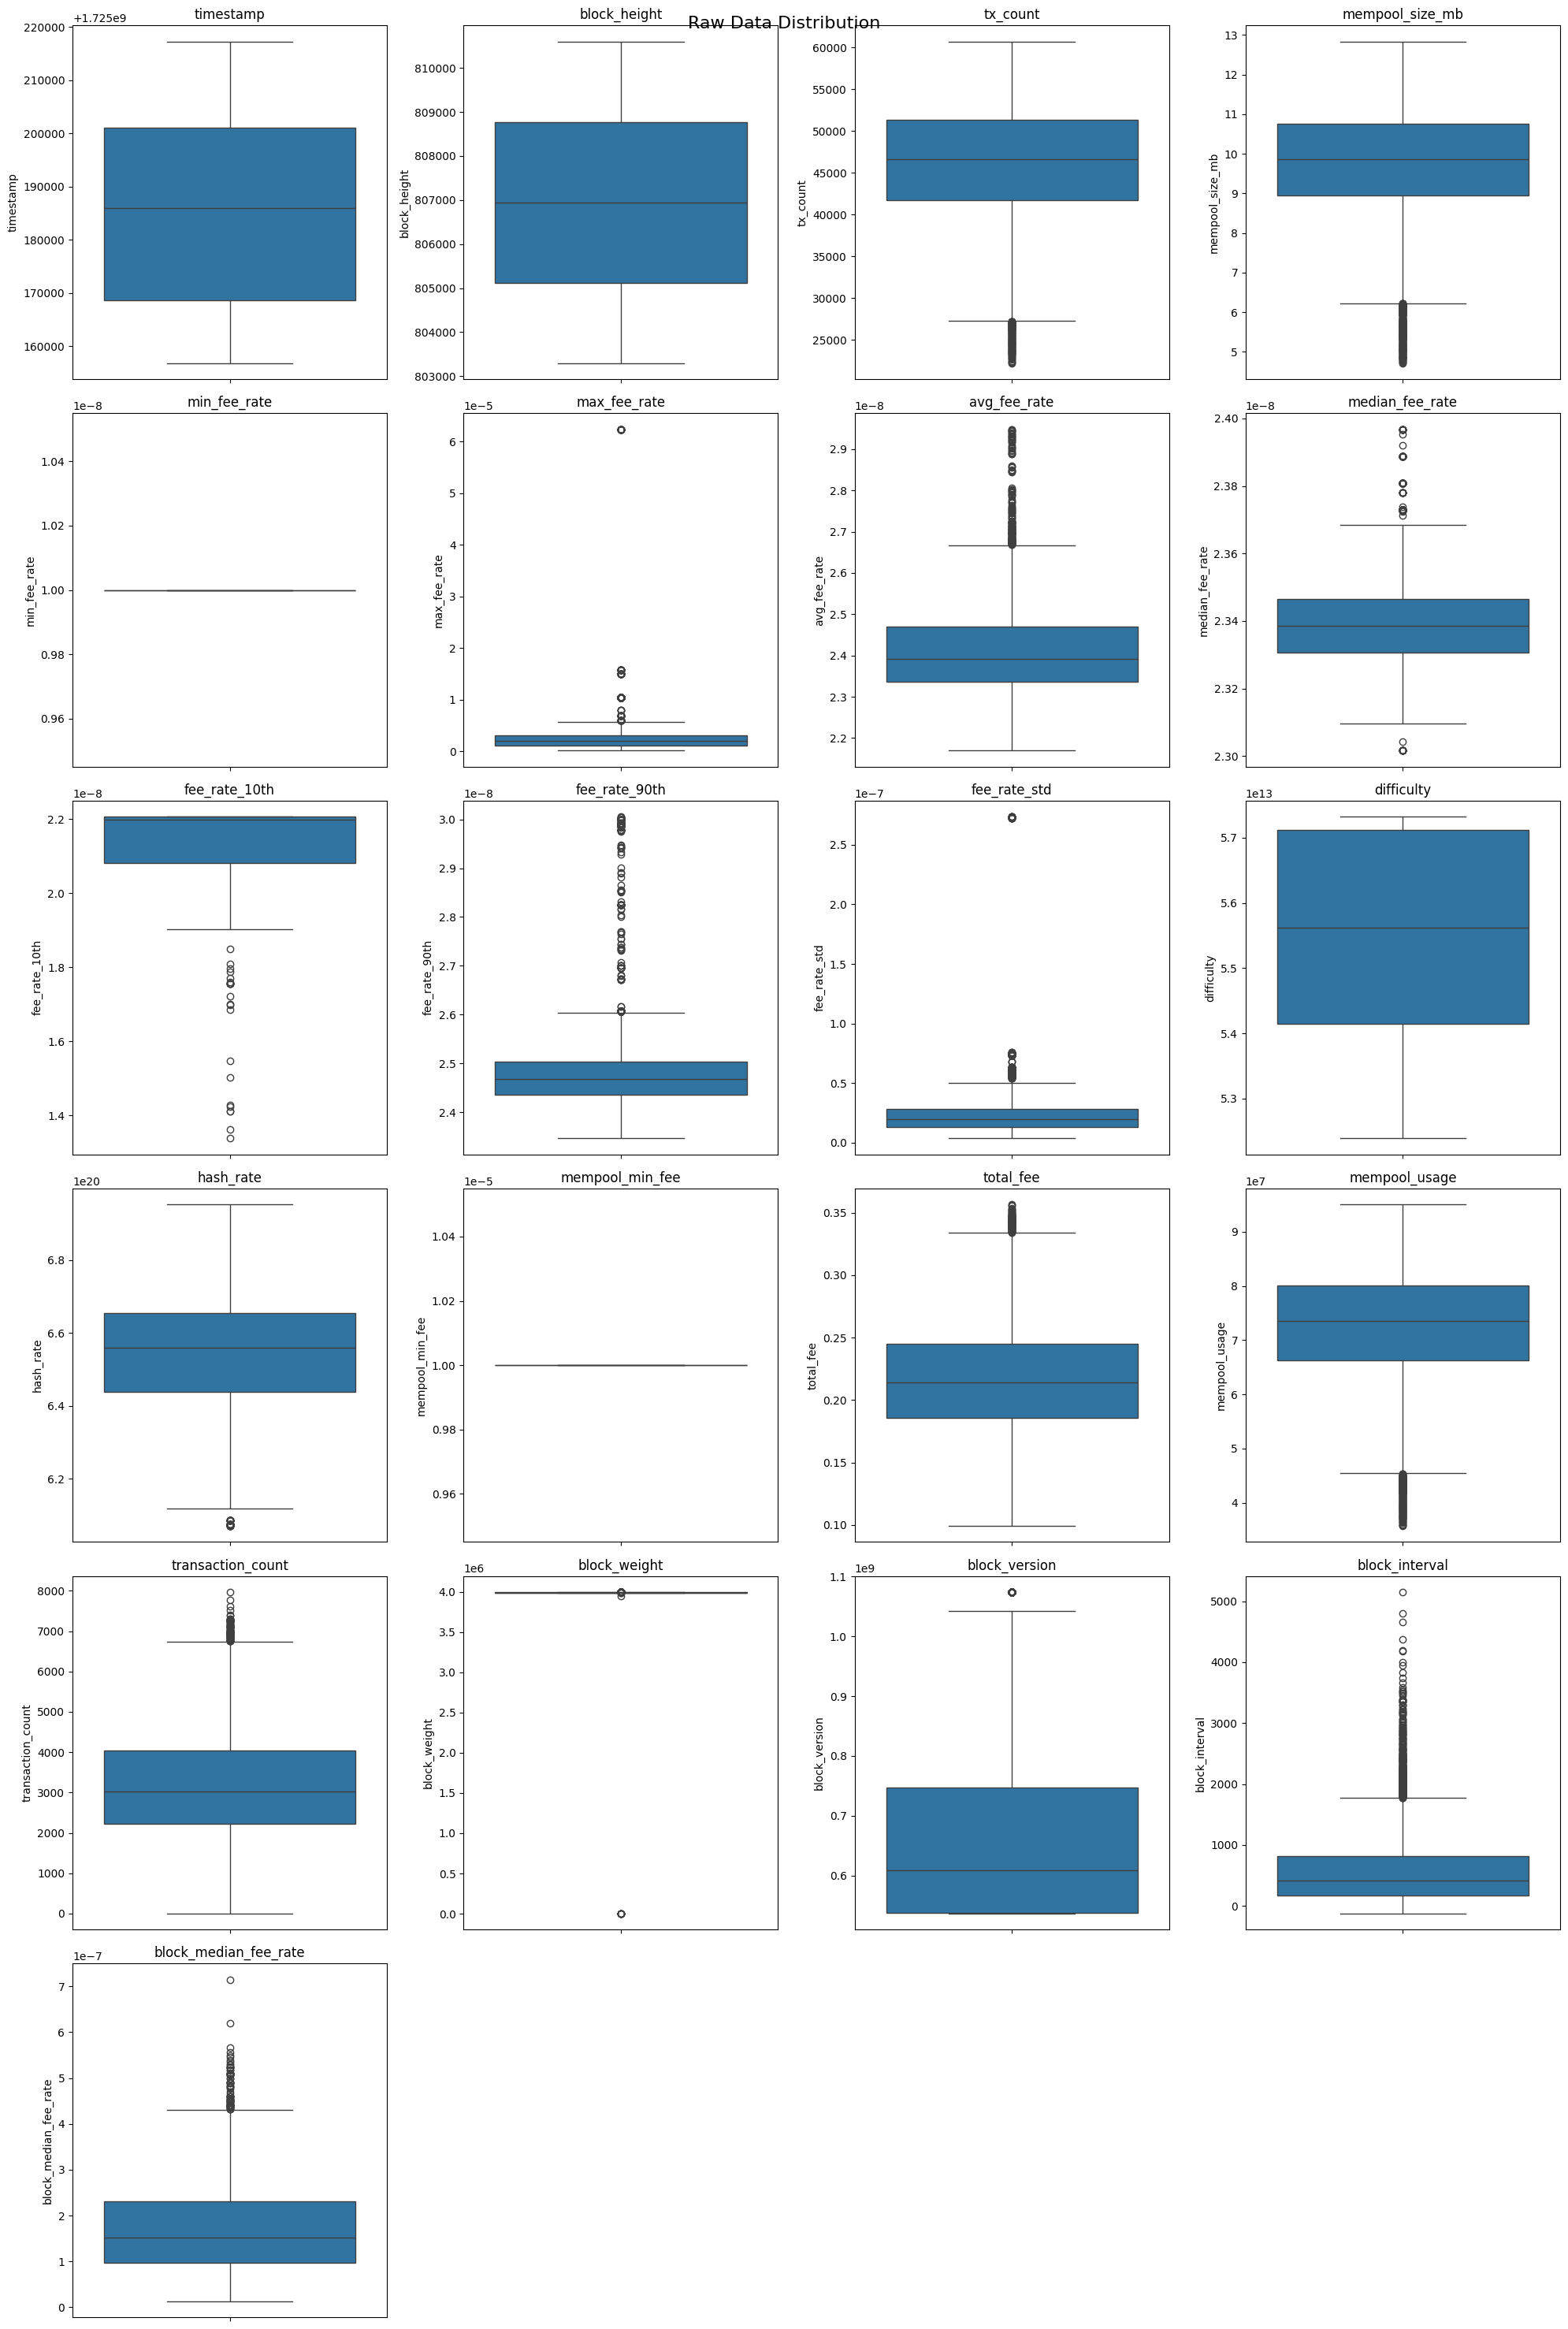

In [98]:
print("Original data shape:", df.shape)

duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Removed {duplicates} duplicate rows.")

nan_counts = df.isna().sum()
columns_with_nan = nan_counts[nan_counts > 0]
if not columns_with_nan.empty:
    print("\nColumns with NaN values:")
    print(columns_with_nan)
    
    # Handle NaN values
    median_interval = df['block_interval'].median()  # Calculate median interval once
    for column in columns_with_nan.index:
        if column == 'block_interval':
            # For the first row, use the median interval. For others, forward fill.
            df['block_interval'] = df['block_interval'].ffill().fillna(median_interval)
        elif column == 'block_median_fee_rate':
            # Use forward fill, then backward fill for any remaining NaNs
            df[column] = df[column].ffill().bfill()
        elif column in ['mempool_size_mb', 'tx_count', 'mempool_usage']:
            # For mempool-related metrics, 0 might be appropriate if the mempool was empty
            df[column] = df[column].fillna(0)
        else:
            # For other columns, use forward fill, then backward fill
            df[column] = df[column].ffill().bfill()

    remaining_nans = df.isna().sum()[df.isna().sum() > 0]
    if not remaining_nans.empty:
        print("\nRemaining NaN values after handling:")
        print(remaining_nans)
    else:
        print("No NaN values found after handling.")
else:
    print("No NaN values found.")

# If there are still any NaN values, drop those rows
rows_before = df.shape[0]
df = df.dropna()
rows_after = df.shape[0]
if rows_before > rows_after:
    print(f"\nDropped {rows_before - rows_after} rows with remaining NaN values.")


if df.empty:
    print("Warning: DataFrame is empty after cleaning. Please check the data processing steps.")
else:
    # Plotting the distribution of the cleaned data
    plot_boxplots(df, "Raw Data Distribution")


In [102]:
# Log transform fee-related features
fee_features = [
        'min_fee_rate', 'max_fee_rate', 'avg_fee_rate', 'median_fee_rate', 
        'fee_rate_10th', 'fee_rate_90th', 'fee_rate_std', 'total_fee', 
        'mempool_min_fee', 'block_median_fee_rate'
    ]
for feature in fee_features:
    df[f'{feature}_log'] = np.log1p(df[feature])

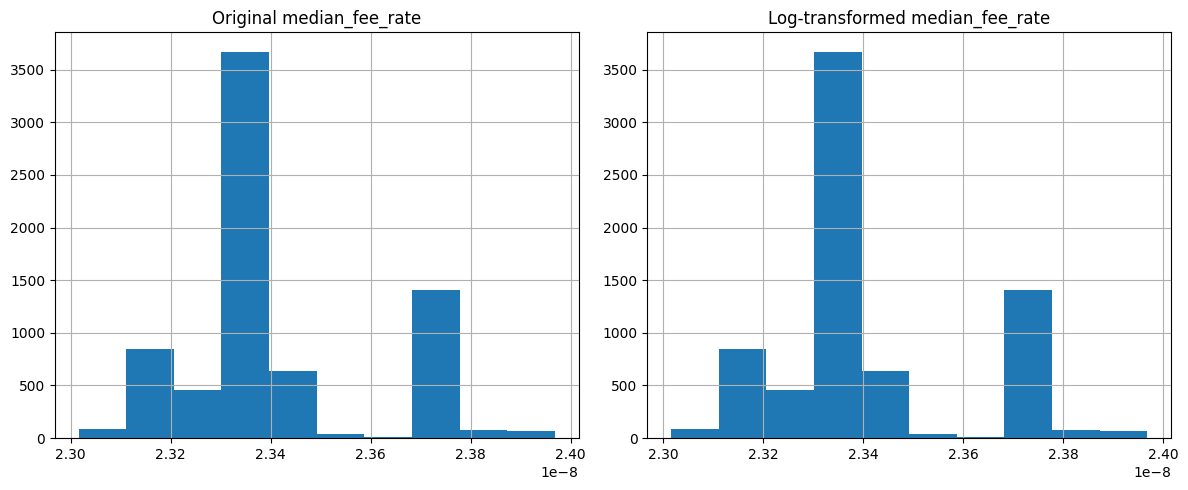

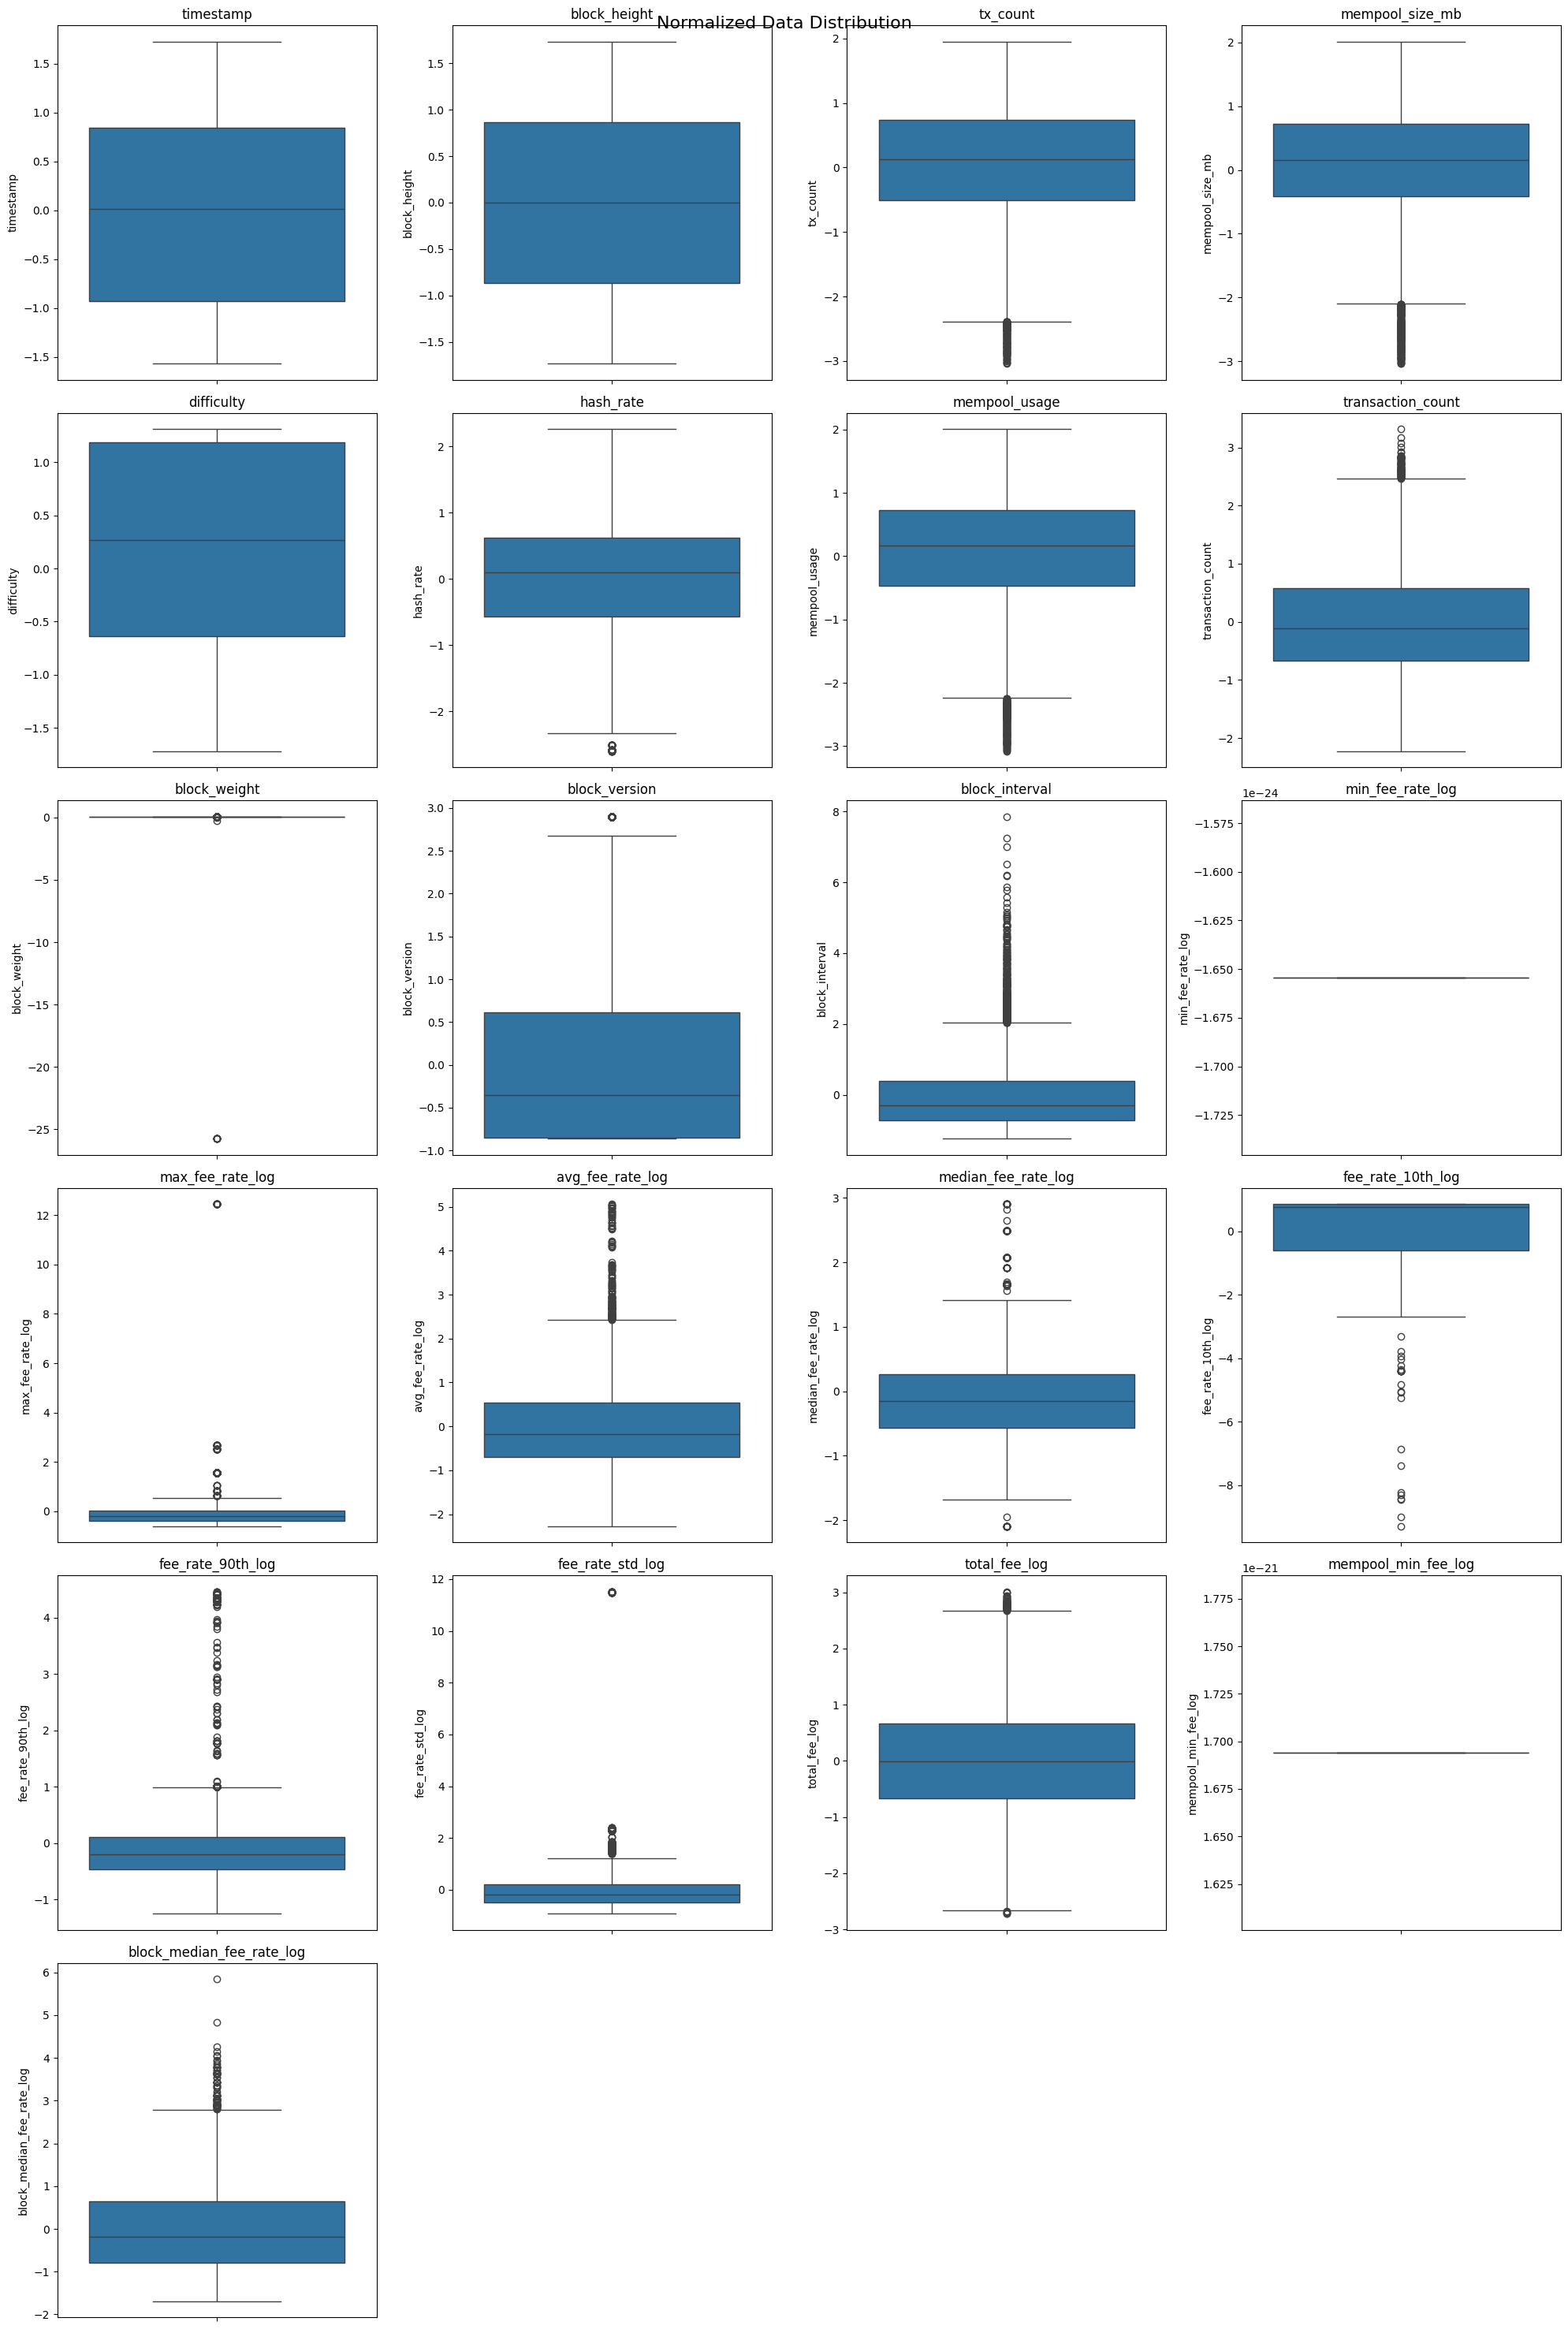

Capped outliers in 1832 instances.
Final data shape: (7300, 21)


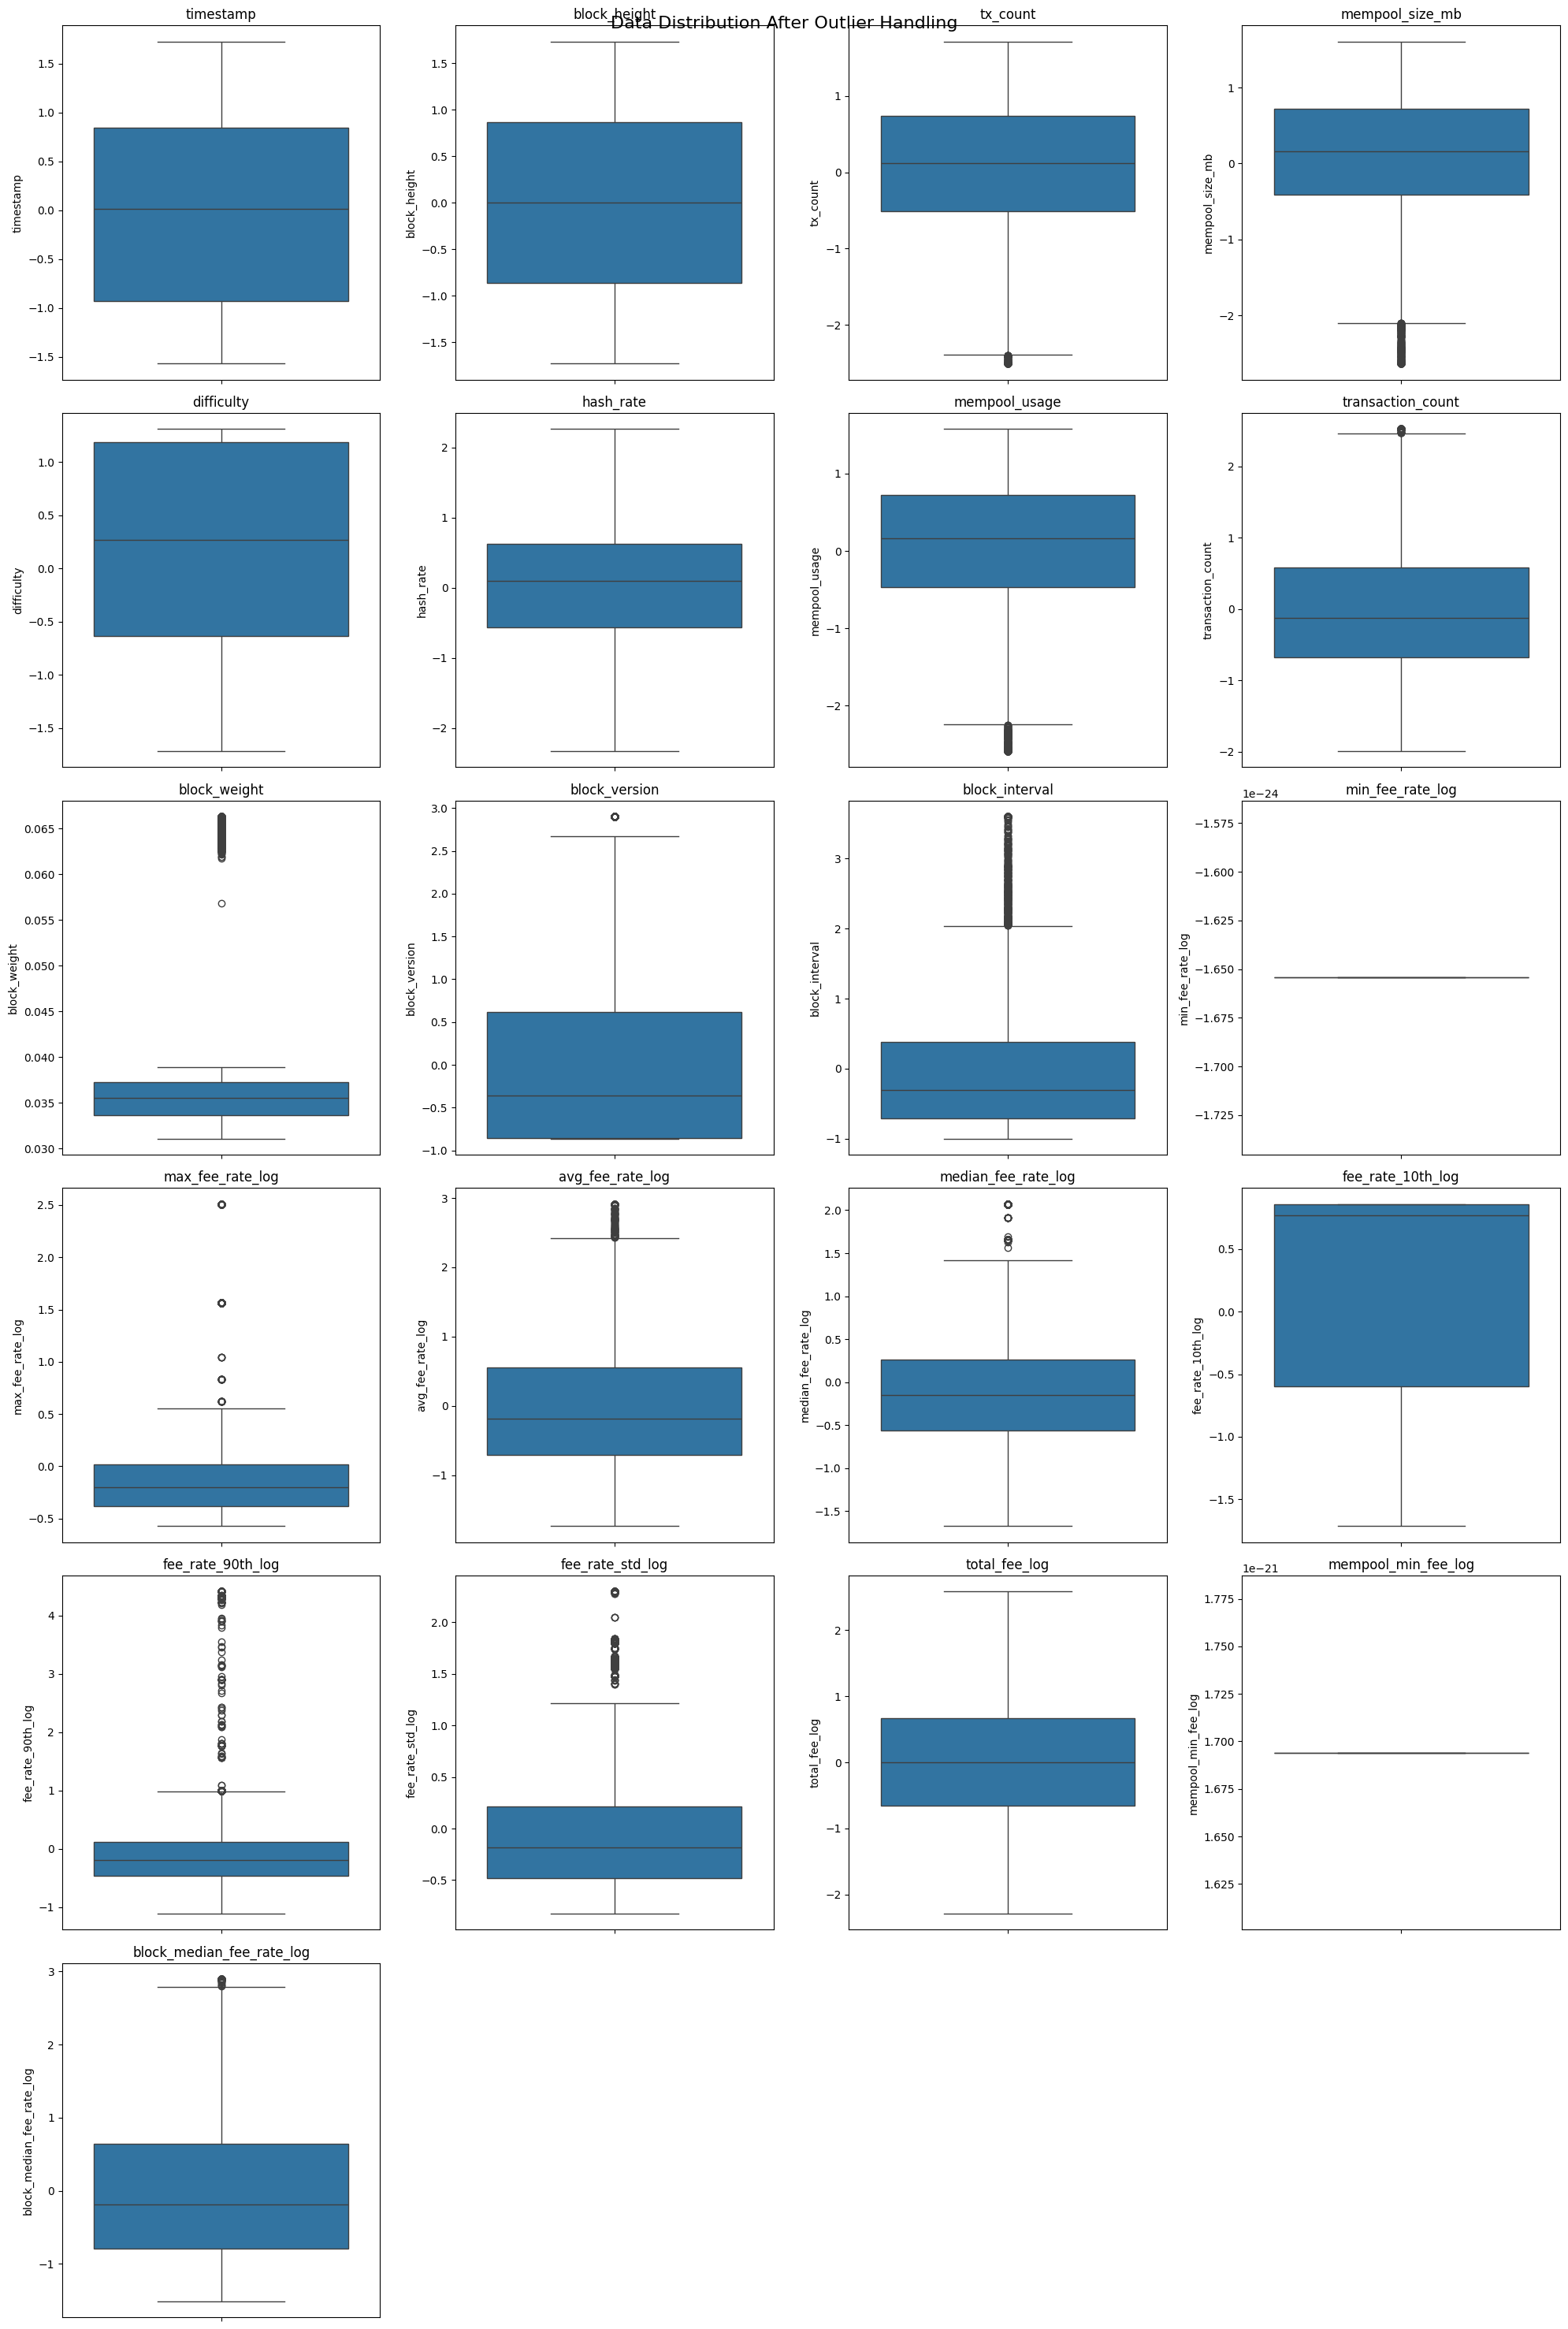

In [104]:
# Visualize original vs log-transformed distributions for a sample fee feature
plt.figure(figsize=(12, 5))
plt.subplot(121)
df['median_fee_rate'].hist()
plt.title('Original median_fee_rate')
plt.subplot(122)
df['median_fee_rate'].hist()
plt.title('Log-transformed median_fee_rate')
plt.tight_layout()
plt.show()

# Normalize the data using StandardScaler
scaler = StandardScaler()
columns_to_normalize = df.columns.drop(fee_features)  # Don't normalize original fee features
df_normalized = pd.DataFrame(index=df.index)
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
for feature in fee_features:
    df_normalized[f'{feature}_log'] = scaler.fit_transform(df[[f'{feature}_log']])

plot_boxplots(df_normalized, "Normalized Data Distribution")

# Handle outliers using a less aggressive method
def handle_outliers(data, column, lower_percentile=1, upper_percentile=99):
    lower = np.percentile(data[column], lower_percentile)
    upper = np.percentile(data[column], upper_percentile)
    data[column] = data[column].clip(lower, upper)
    return data

df_cleaned = df_normalized.copy()
for column in df_cleaned.columns:
    if column not in ['block_height', 'timestamp', 'difficulty']:  # Don't process these columns
        df_cleaned = handle_outliers(df_cleaned, column)

# Count capped outliers
outliers_capped = ((df_normalized != df_cleaned) & ~df_normalized.isna() & ~df_cleaned.isna()).sum().sum()
print(f"Capped outliers in {outliers_capped} instances.")
print("Final data shape:", df_cleaned.shape)

plot_boxplots(df_cleaned, "Data Distribution After Outlier Handling")


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7300 entries, 2023-08-15 13:04:26 to 2023-10-04 10:13:59
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  7300 non-null   int64  
 1   block_height               7300 non-null   int64  
 2   tx_count                   7300 non-null   int64  
 3   mempool_size_mb            7300 non-null   float64
 4   min_fee_rate               7300 non-null   float64
 5   max_fee_rate               7300 non-null   float64
 6   avg_fee_rate               7300 non-null   float64
 7   median_fee_rate            7300 non-null   float64
 8   fee_rate_10th              7300 non-null   float64
 9   fee_rate_90th              7300 non-null   float64
 10  fee_rate_std               7300 non-null   float64
 11  difficulty                 7300 non-null   float64
 12  hash_rate                  7300 non-null   float64
 13  mempool_min_

In [106]:
print("\nSummary statistics of raw data:")
print(df_raw.describe())

print("\nSummary statistics of normalized data:")
print(df_normalized.describe())

print("\nSummary statistics of cleaned data:")
print(df_cleaned.describe())

df_cleaned.to_csv('bitcoin_data_cleaned.csv')
print("Cleaned data saved to 'bitcoin_data_cleaned.csv'")



Summary statistics of raw data:
          timestamp   block_height      tx_count  mempool_size_mb  \
count  7.200000e+03    7200.000000   7200.000000      7200.000000   
mean   1.725185e+09  806898.500000  45654.852083         9.574323   
std    1.809901e+04    2078.605302   7749.719520         1.608191   
min    1.725157e+09  803299.000000  22254.000000         4.714981   
25%    1.725168e+09  805098.750000  41538.750000         8.918859   
50%    1.725186e+09  806898.500000  46626.000000         9.832154   
75%    1.725200e+09  808698.250000  51413.250000        10.713506   
max    1.725216e+09  810498.000000  60694.000000        12.832033   

       min_fee_rate  max_fee_rate  avg_fee_rate  median_fee_rate  \
count  7.200000e+03  7.200000e+03  7.200000e+03     7.200000e+03   
mean   1.000000e-08  3.031514e-06  2.408507e-08     2.341620e-08   
std    1.654476e-24  4.803402e-06  1.046830e-09     1.915638e-10   
min    1.000000e-08  1.500000e-07  2.169504e-08     2.301587e-08   
25%  

In [107]:
a=3